In [121]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as ac 
from sklearn.metrics import classification_report as report,roc_curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [66]:
test_data = pd.read_csv('SalaryData_Test(1).csv')

train_data = pd.read_csv('SalaryData_Train(1).csv (1)')


In [67]:
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [68]:
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,21,Private,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0.0,0.0,36.0,United-States,<=50K
505,28,Private,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0.0,0.0,40.0,United-States,<=50K
506,46,Self-emp-not-inc,Some-college,10,Divorced,Exec-managerial,Not-in-family,White,Male,0.0,0.0,50.0,United-States,<=50K
507,36,Self-emp-not-inc,HS-grad,9,Separated,Other-service,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K


In [69]:
df_temp = test_data.append(train_data)
df_temp

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,21,Private,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0.0,0.0,36.0,United-States,<=50K
505,28,Private,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0.0,0.0,40.0,United-States,<=50K
506,46,Self-emp-not-inc,Some-college,10,Divorced,Exec-managerial,Not-in-family,White,Male,0.0,0.0,50.0,United-States,<=50K
507,36,Self-emp-not-inc,HS-grad,9,Separated,Other-service,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K


In [70]:
train = train_data.copy()
test = test_data.copy()
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [71]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [72]:
str_c = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]
str_c

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

    index  Salary
0   <=50K   11754
1    >50K    3814


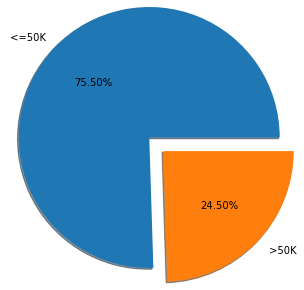

In [73]:
plt.rcParams['figure.figsize']=(3,3)
plt.pie(df_temp.Salary.value_counts().values, labels = df_temp.Salary.value_counts().index, autopct="%1.2f%%", radius =2, shadow=True, explode=(0,0.3))
print(df_temp.Salary.value_counts().reset_index())

In [74]:
for i in str_c:
    train[i]= LabelEncoder().fit_transform(train[i])
    test[i]=LabelEncoder().fit_transform(test[i])
    
mapping = {' >50K': 1, ' <=50K': 0}    
train = train.replace({'Salary': mapping})
test = test.replace({'Salary': mapping})

In [75]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


In [76]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174.0,0.0,40.0,23,0.0
1,50,4,9,13,2,3,0,4,1,0.0,0.0,13.0,23,0.0
2,38,2,11,9,0,5,1,4,1,0.0,0.0,40.0,23,0.0
3,53,2,1,7,2,5,0,2,1,0.0,0.0,40.0,23,0.0
4,28,2,9,13,2,9,5,2,0,0.0,0.0,40.0,3,0.0


In [77]:
df = train.append(test) 

In [78]:
df1 = df.copy()
df1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174.0,0.0,40.0,23,0.0
1,50,4,9,13,2,3,0,4,1,0.0,0.0,13.0,23,0.0
2,38,2,11,9,0,5,1,4,1,0.0,0.0,40.0,23,0.0
3,53,2,1,7,2,5,0,2,1,0.0,0.0,40.0,23,0.0
4,28,2,9,13,2,9,5,2,0,0.0,0.0,40.0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0.0,0.0,40.0,37,0.0
15056,39,2,9,13,0,9,1,4,0,0.0,0.0,36.0,37,0.0
15057,38,2,9,13,2,9,0,4,1,0.0,0.0,50.0,37,0.0
15058,44,2,9,13,0,0,3,1,1,5455.0,0.0,40.0,37,0.0


In [79]:
df1.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,15569.000000,15569.000000,15569.000000,15569.000000,15569.000000,15569.000000,15569.000000,15569.000000,15569.000000,15568.000000,15568.000000,15568.000000,15569.000000,15568.000000
mean,38.740253,2.213116,10.279401,10.114715,2.594515,5.997495,1.403815,3.682510,0.673775,1101.682169,89.468140,40.928443,35.031344,0.244990
std,13.367512,0.965851,3.822590,2.557674,1.506136,4.020829,1.591106,0.828251,0.468983,7589.634072,407.015562,12.047961,6.280714,0.430095
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000,0.000000
50%,37.000000,2.000000,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000,0.000000
75%,48.000000,2.000000,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000,0.000000
max,90.000000,6.000000,15.000000,16.000000,7.000000,14.000000,6.000000,5.000000,2.000000,99999.000000,3770.000000,99.000000,39.000000,1.000000


In [80]:
df1.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      1
capitalloss      1
hoursperweek     1
native           0
Salary           1
dtype: int64

In [81]:
workclass_df = df_temp.groupby(['Salary', 'workclass']).size().reset_index().rename(columns={0:'Num of individuals'})
workclass_df

,Salary,workclass,Num of individuals
0,<=50K,Federal-gov,288
1,<=50K,Local-gov,760
2,<=50K,Private,8949
3,<=50K,Self-emp-inc,266
4,<=50K,Self-emp-not-inc,982
5,<=50K,State-gov,504
6,<=50K,Without-pay,5
7,>50K,Federal-gov,192
8,>50K,Local-gov,314
9,>50K,Private,2446


Text(0.5, 1.1, 'Workclass of individuals to corresponding Salary')

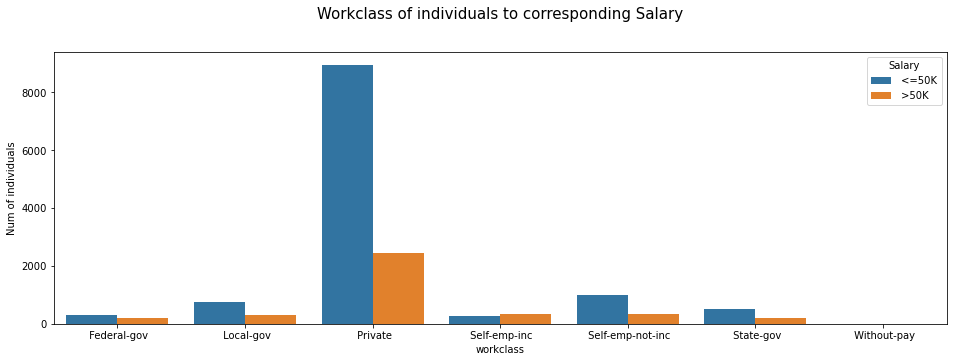

In [82]:
plt.figure(figsize=(16,5))
sns.barplot(x = 'workclass', y='Num of individuals', hue='Salary', data=workclass_df)
plt.title("Workclass of individuals to corresponding Salary", y = 1.1, fontsize=15)

In [83]:
edu_df = df_temp.groupby(['Salary', 'education']).size().reset_index().rename(columns={0:'Num of individuals'})
edu_df.head()

,Salary,education,Num of individuals
0,<=50K,10th,387
1,<=50K,11th,562
2,<=50K,12th,187
3,<=50K,1st-4th,72
4,<=50K,5th-6th,157


Text(0.5, 1.03, 'Education of individuals to corresponding Salary')

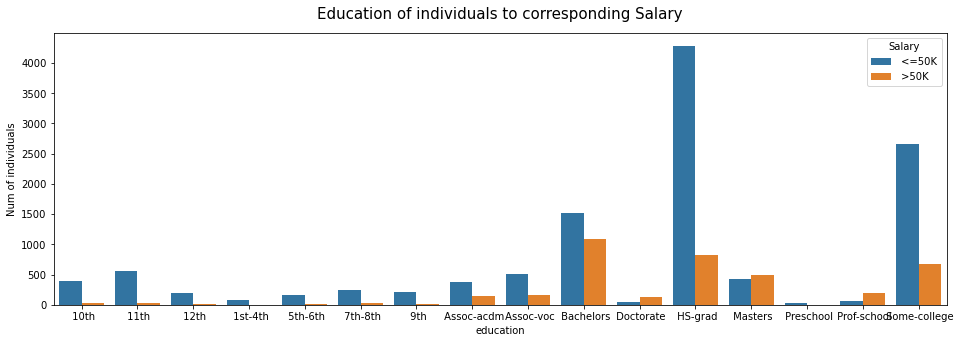

In [84]:
plt.figure(figsize=(16,5))
sns.barplot(x = 'education', y='Num of individuals', hue = 'Salary', data=edu_df)
plt.title("Education of individuals to corresponding Salary", y = 1.03, fontsize=15)

In [85]:
rel_df = df_temp.groupby(['maritalstatus', 'relationship', 'Salary']).size().reset_index().rename(columns={0:'Num of indv'})
rel_df.head()

,maritalstatus,relationship,Salary,Num of indv
0,Divorced,Not-in-family,<=50K,1065
1,Divorced,Not-in-family,>50K,146
2,Divorced,Other-relative,<=50K,62
3,Divorced,Other-relative,>50K,2
4,Divorced,Own-child,<=50K,123


Text(0.5, 1.1, 'Salary category wrt Marital status')

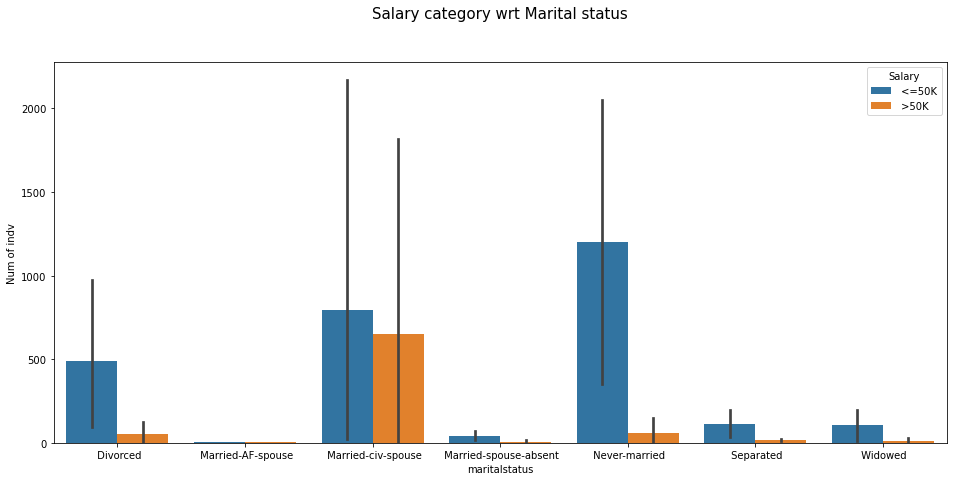

In [86]:
plt.figure(figsize=(16,7))
sns.barplot(x= 'maritalstatus', y='Num of indv', hue='Salary', data=rel_df)
plt.title("Salary category wrt Marital status", y = 1.1, fontsize=15)

Text(0.5, 1.1, 'Salary category wrt Relationship')

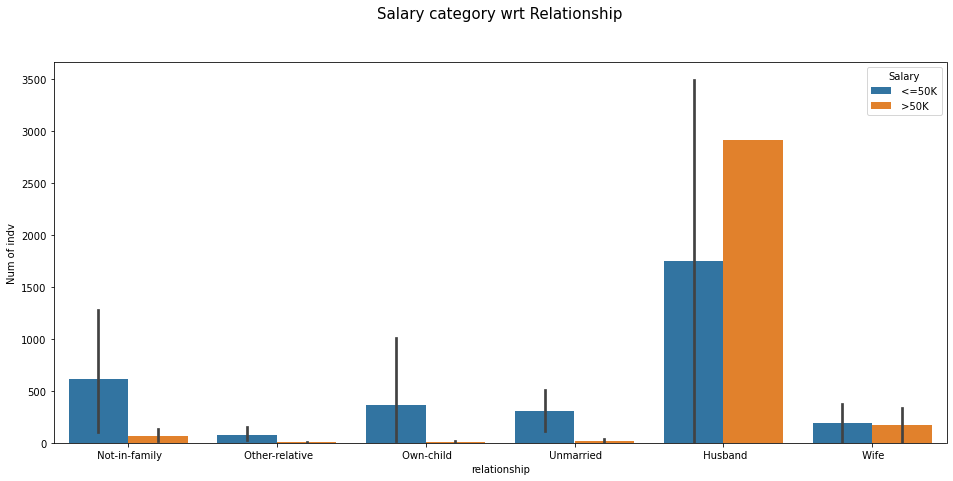

In [87]:
plt.figure(figsize=(16,7))
sns.barplot(x= 'relationship', y='Num of indv', hue='Salary', data=rel_df)
plt.title("Salary category wrt Relationship", y = 1.1, fontsize=15)

In [88]:
occ_df = df_temp.groupby(['occupation', 'workclass', 'Salary']).size().reset_index().rename(columns={0:'Num of Indv'})
occ_df_sort = occ_df.sort_values('Num of Indv', ascending=False)
occ_df_sort.head()

,occupation,workclass,Salary,Num of Indv
78,Other-service,Private,<=50K,1297
18,Craft-repair,Private,<=50K,1239
4,Adm-clerical,Private,<=50K,1229
113,Sales,Private,<=50K,1174
65,Machine-op-inspct,Private,<=50K,862


Text(0.5, 1.01, 'Diff occupations with corresponding workclass')

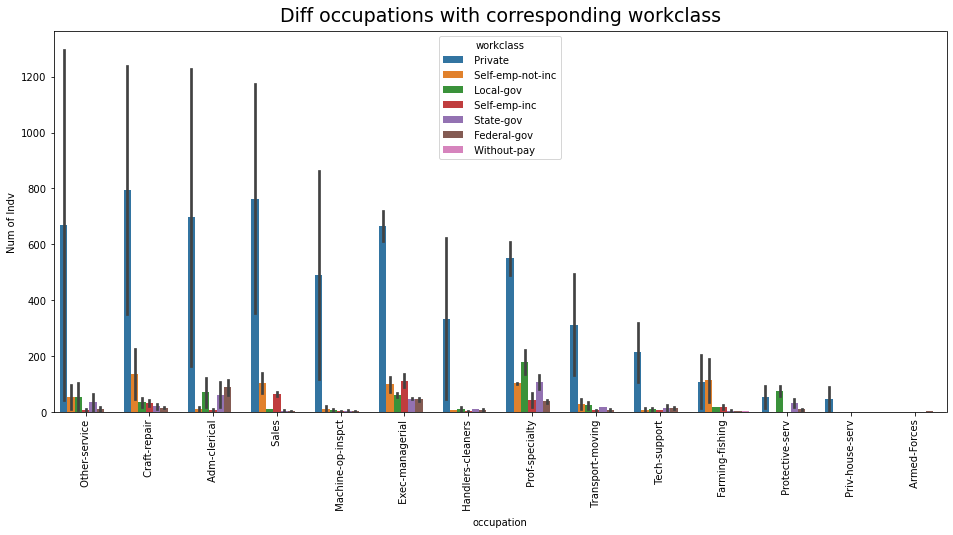

In [89]:
plt.figure(figsize=(16,7))
sns.barplot(x='occupation', y = 'Num of Indv', hue='workclass', data=occ_df_sort)
plt.xticks(rotation=90)
plt.title("Diff occupations with corresponding workclass", y=1.01, fontsize=19)

Text(0.5, 1.01, 'Diff occupations with corresponding workclass')

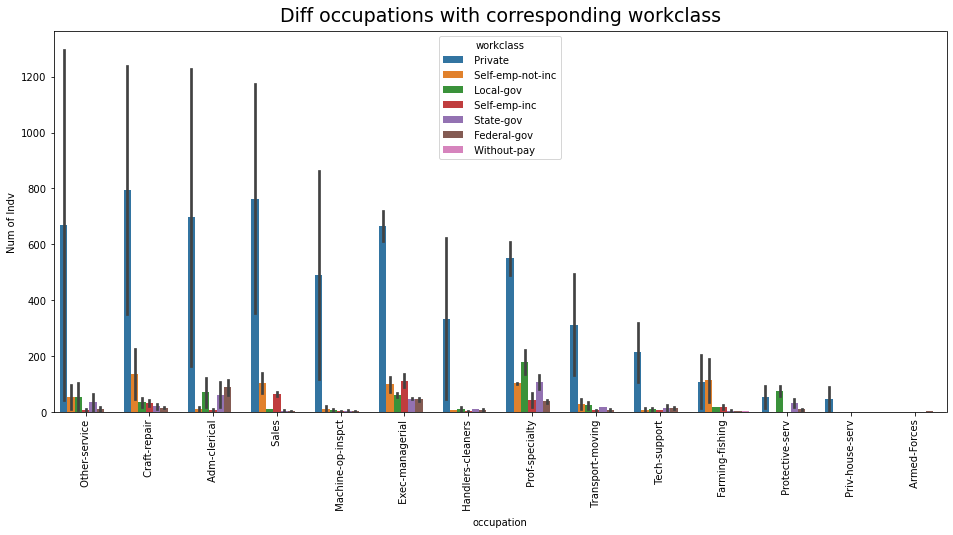

In [90]:
plt.figure(figsize=(16,7))
sns.barplot(x='occupation', y = 'Num of Indv', hue='workclass', data=occ_df_sort)
plt.xticks(rotation=90)
plt.title("Diff occupations with corresponding workclass", y=1.01, fontsize=19)

In [91]:
race_df = df_temp.groupby(['Salary', 'race']).size().reset_index().rename(columns={0:'Num of indv'})
race_df_sort = race_df.sort_values('Num of indv', ascending=False)
race_df_sort

,Salary,race,Num of indv
4,<=50K,White,9927
9,>50K,White,3469
2,<=50K,Black,1296
1,<=50K,Asian-Pac-Islander,294
7,>50K,Black,175
0,<=50K,Amer-Indian-Eskimo,134
6,>50K,Asian-Pac-Islander,127
3,<=50K,Other,103
8,>50K,Other,24
5,>50K,Amer-Indian-Eskimo,19


Text(0.5, 1.02, 'Salary dist according to race')

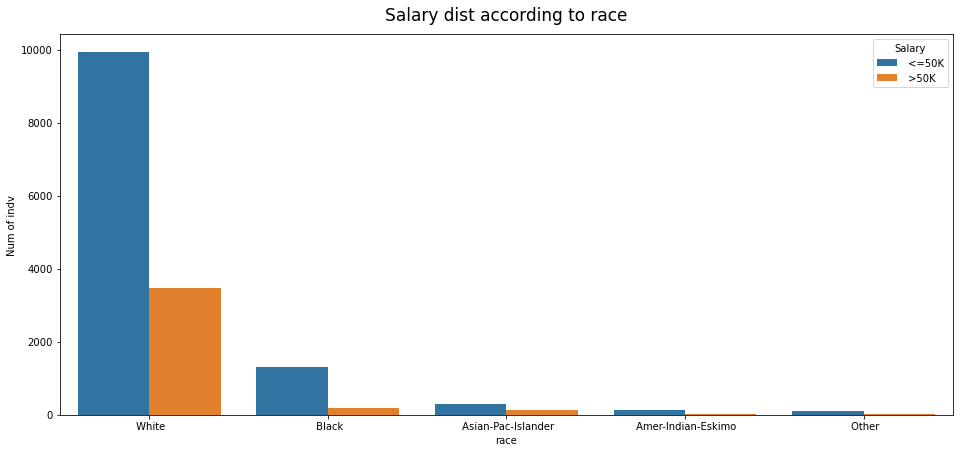

In [92]:
plt.figure(figsize=(16,7))
sns.barplot(x = 'race', y='Num of indv', hue='Salary', data=race_df_sort)
plt.title("Salary dist according to race", y=1.02, fontsize=17)

In [93]:
sex_df = df_temp.groupby(['Salary', 'sex']).size().reset_index().rename(columns={0:'Num of indv'})
sex_df_sort = sex_df.sort_values('Num of indv', ascending=False)
sex_df_sort

,Salary,sex,Num of indv
1,<=50K,Male,7254
0,<=50K,Female,4500
3,>50K,Male,3234
2,>50K,Female,580


Text(0.5, 1.02, 'Salary dist according to sex')

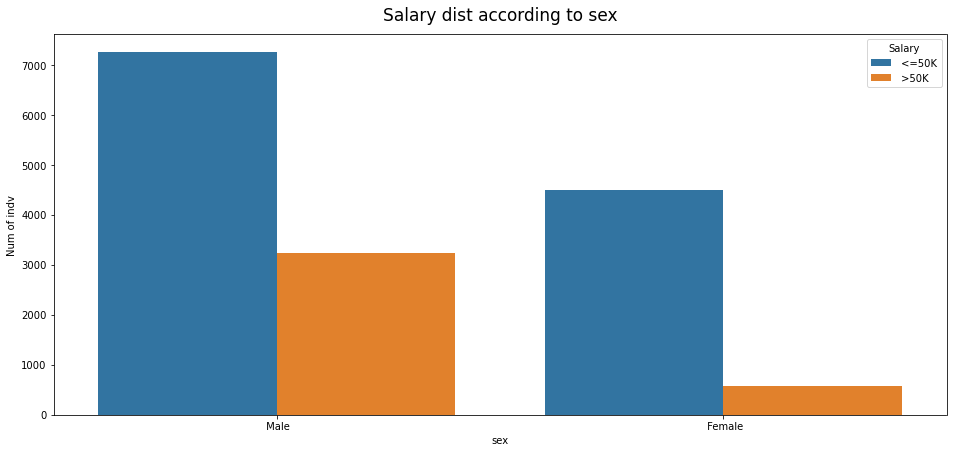

In [94]:
plt.figure(figsize=(16,7))
sns.barplot(x = 'sex', y='Num of indv', hue='Salary', data=sex_df_sort)
plt.title("Salary dist according to sex", y=1.02, fontsize=17)

In [95]:
nat_df = df_temp.groupby(['Salary','native']).size().reset_index().rename(columns={0:'Num of indv'})
nat_df_sort = nat_df.sort_values('Num of indv', ascending=False)
nat_df_sort.head()

,Salary,native,Num of indv
37,<=50K,United-States,10693
73,>50K,United-States,3558
24,<=50K,Mexico,290
28,<=50K,Philippines,73
31,<=50K,Puerto-Rico,62


Text(0.5, 1.01, 'Top 10 native locations corresponding to Salary')

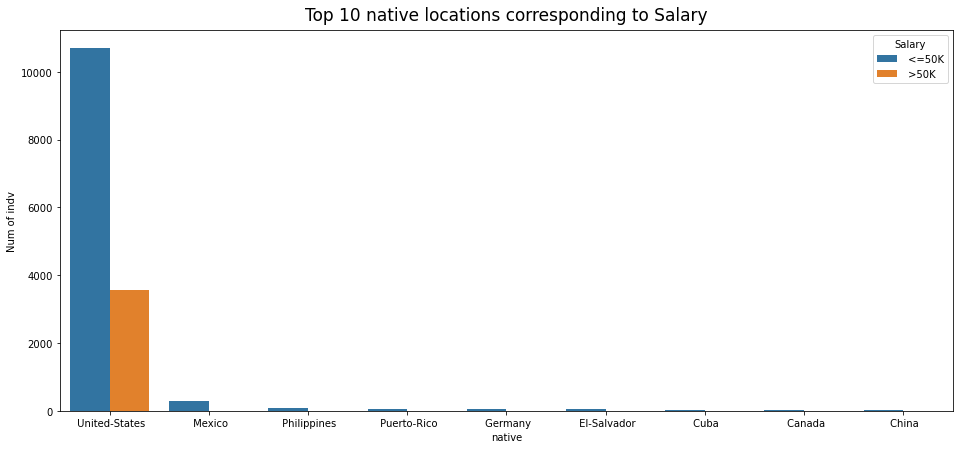

In [96]:
plt.figure(figsize=(16,7))
sns.barplot(x='native', y='Num of indv', hue='Salary', data=nat_df_sort.head(10))
plt.title("Top 10 native locations corresponding to Salary", fontsize=17, y=1.01)

In [97]:
corr = df1.corr()

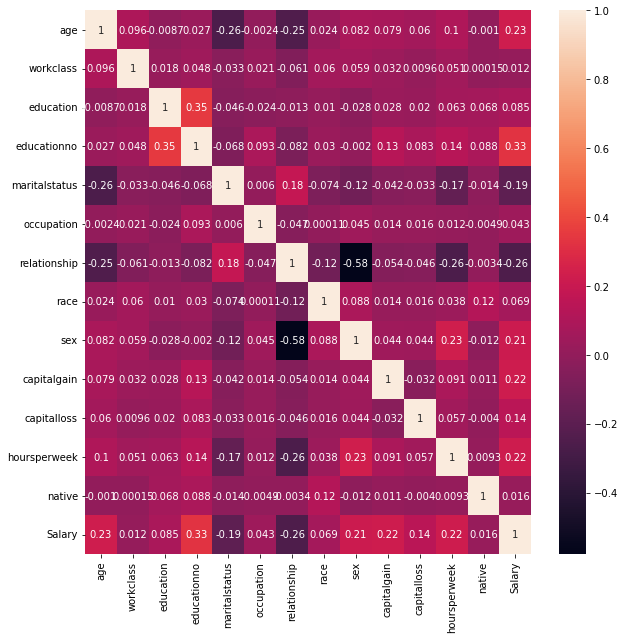

In [98]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

In [99]:
df1.index.is_unique

False

In [100]:
df1=df1.loc[~df1.index.duplicated(), :]

Skew: -0.3286199649303229
Kurtosis: 0.6368103793451141


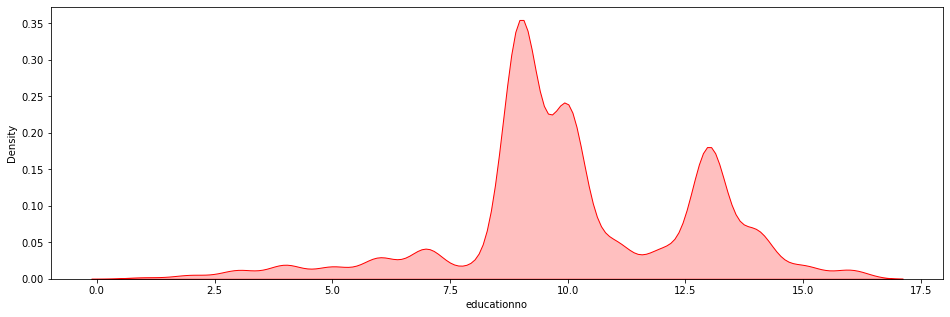

In [101]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['educationno'].skew()))
print("Kurtosis: {}".format(df1['educationno'].kurtosis()))
sns.kdeplot(df1['educationno'],shade=True,color='r')
plt.show()

In [102]:
dfa = df_temp[df_temp.columns[0:13]]
obj_colum = dfa.select_dtypes(include='object')

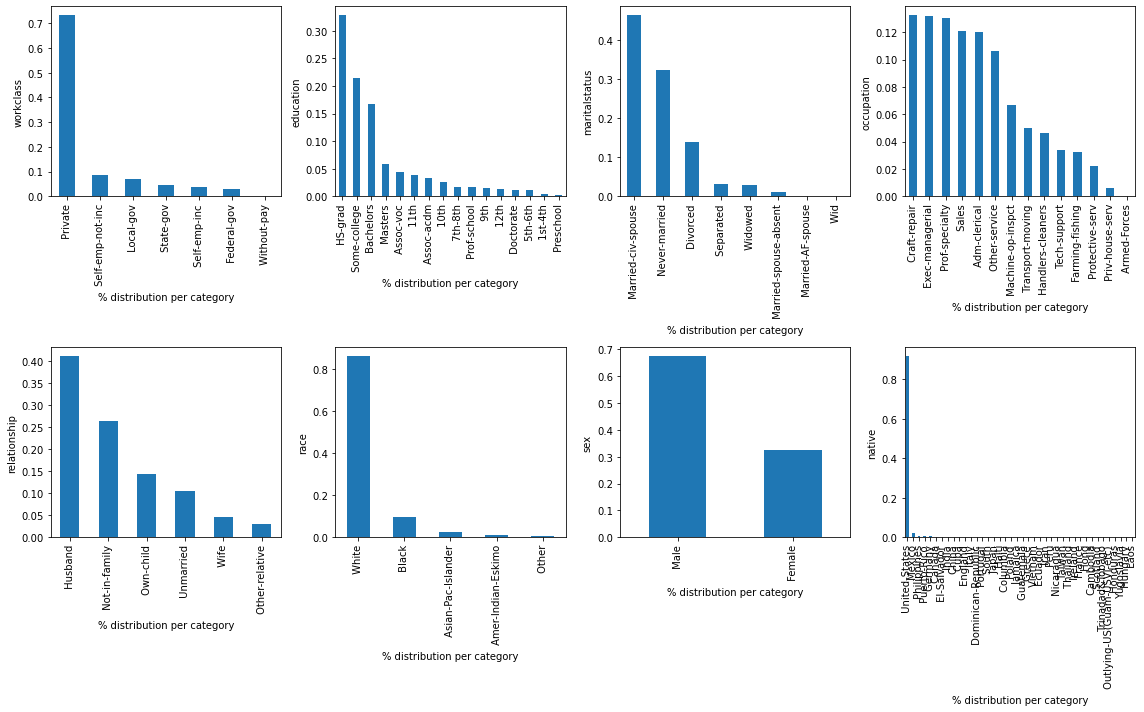

In [103]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,4,i)
    df_temp[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show() 

In [104]:
num_columns = dfa.select_dtypes(exclude='object')

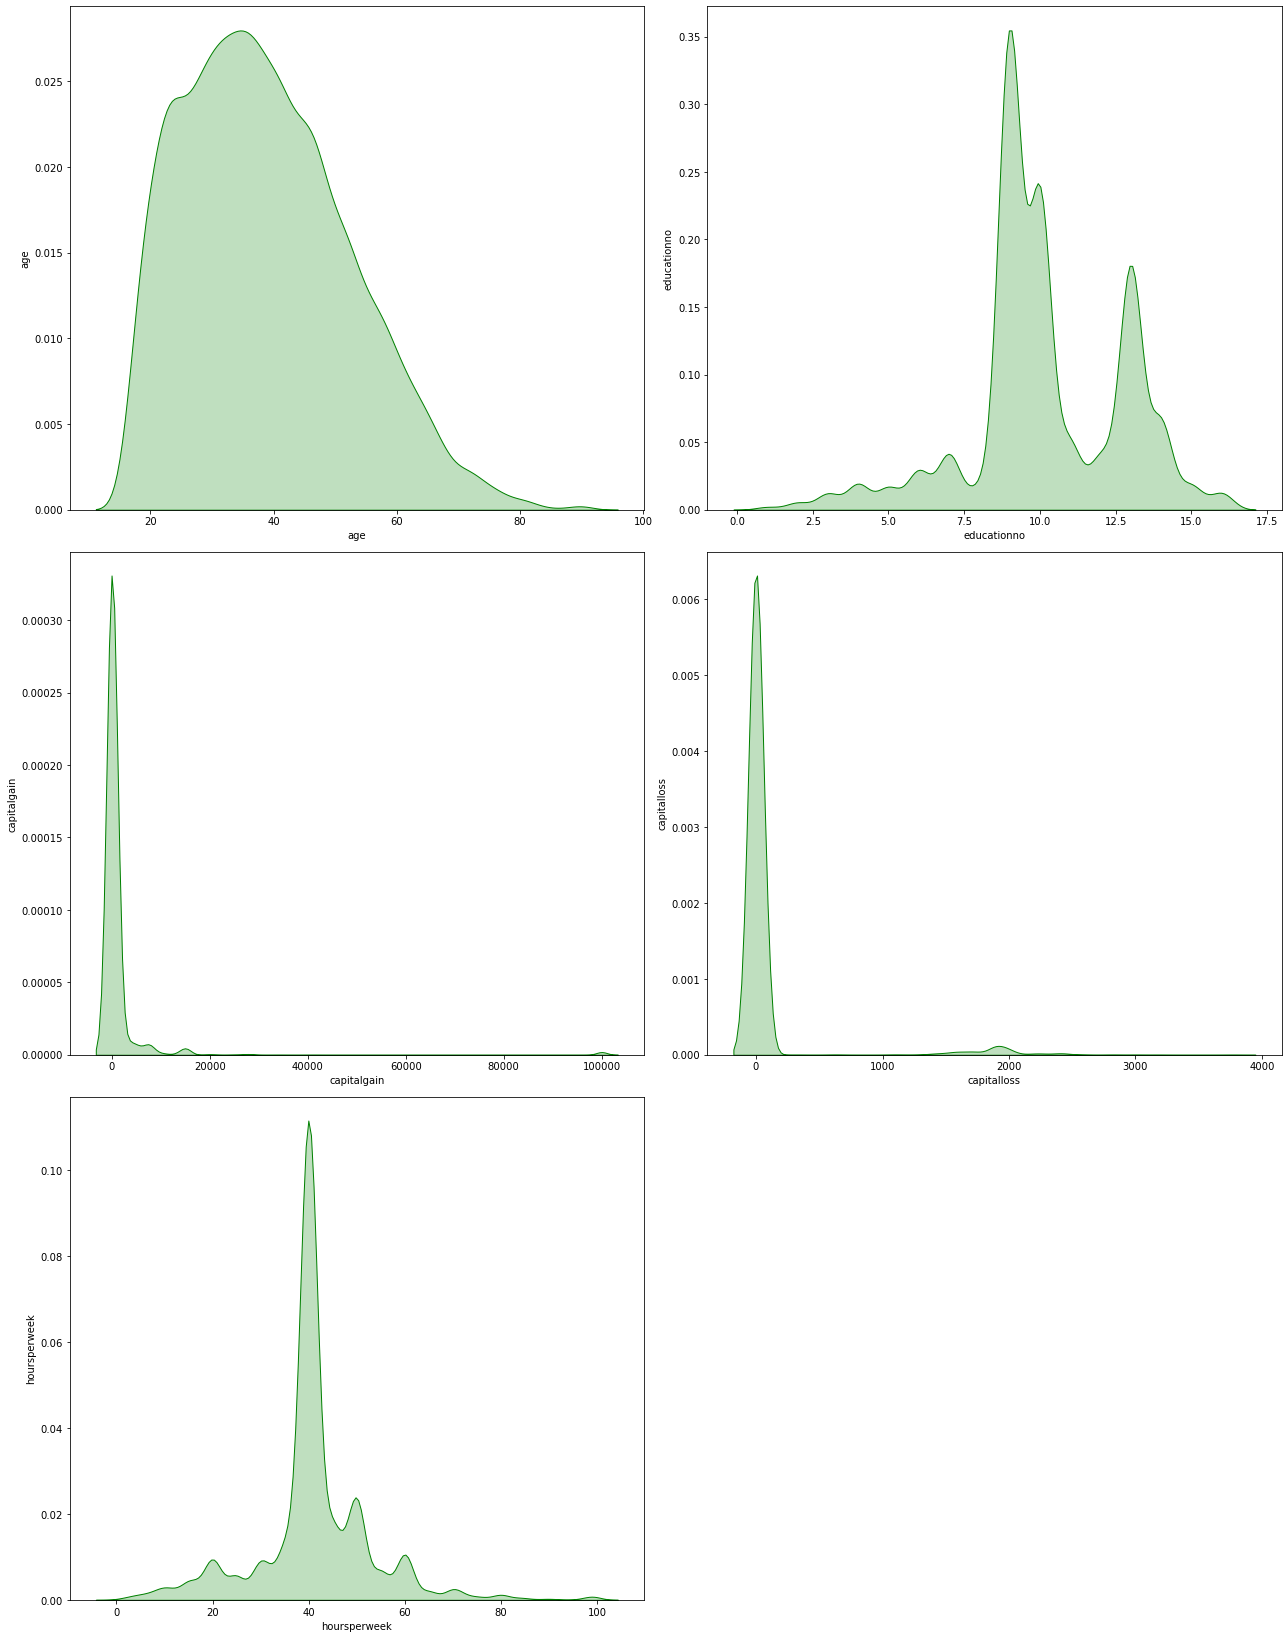

In [105]:
plt.figure(figsize=(18,30))
for i,col in enumerate(num_columns,1):
    plt.subplot(4,2,i)
    sns.kdeplot(df1[col],color='g',shade=True,legend=True)
    plt.ylabel(col)
plt.tight_layout() 
plt.show()

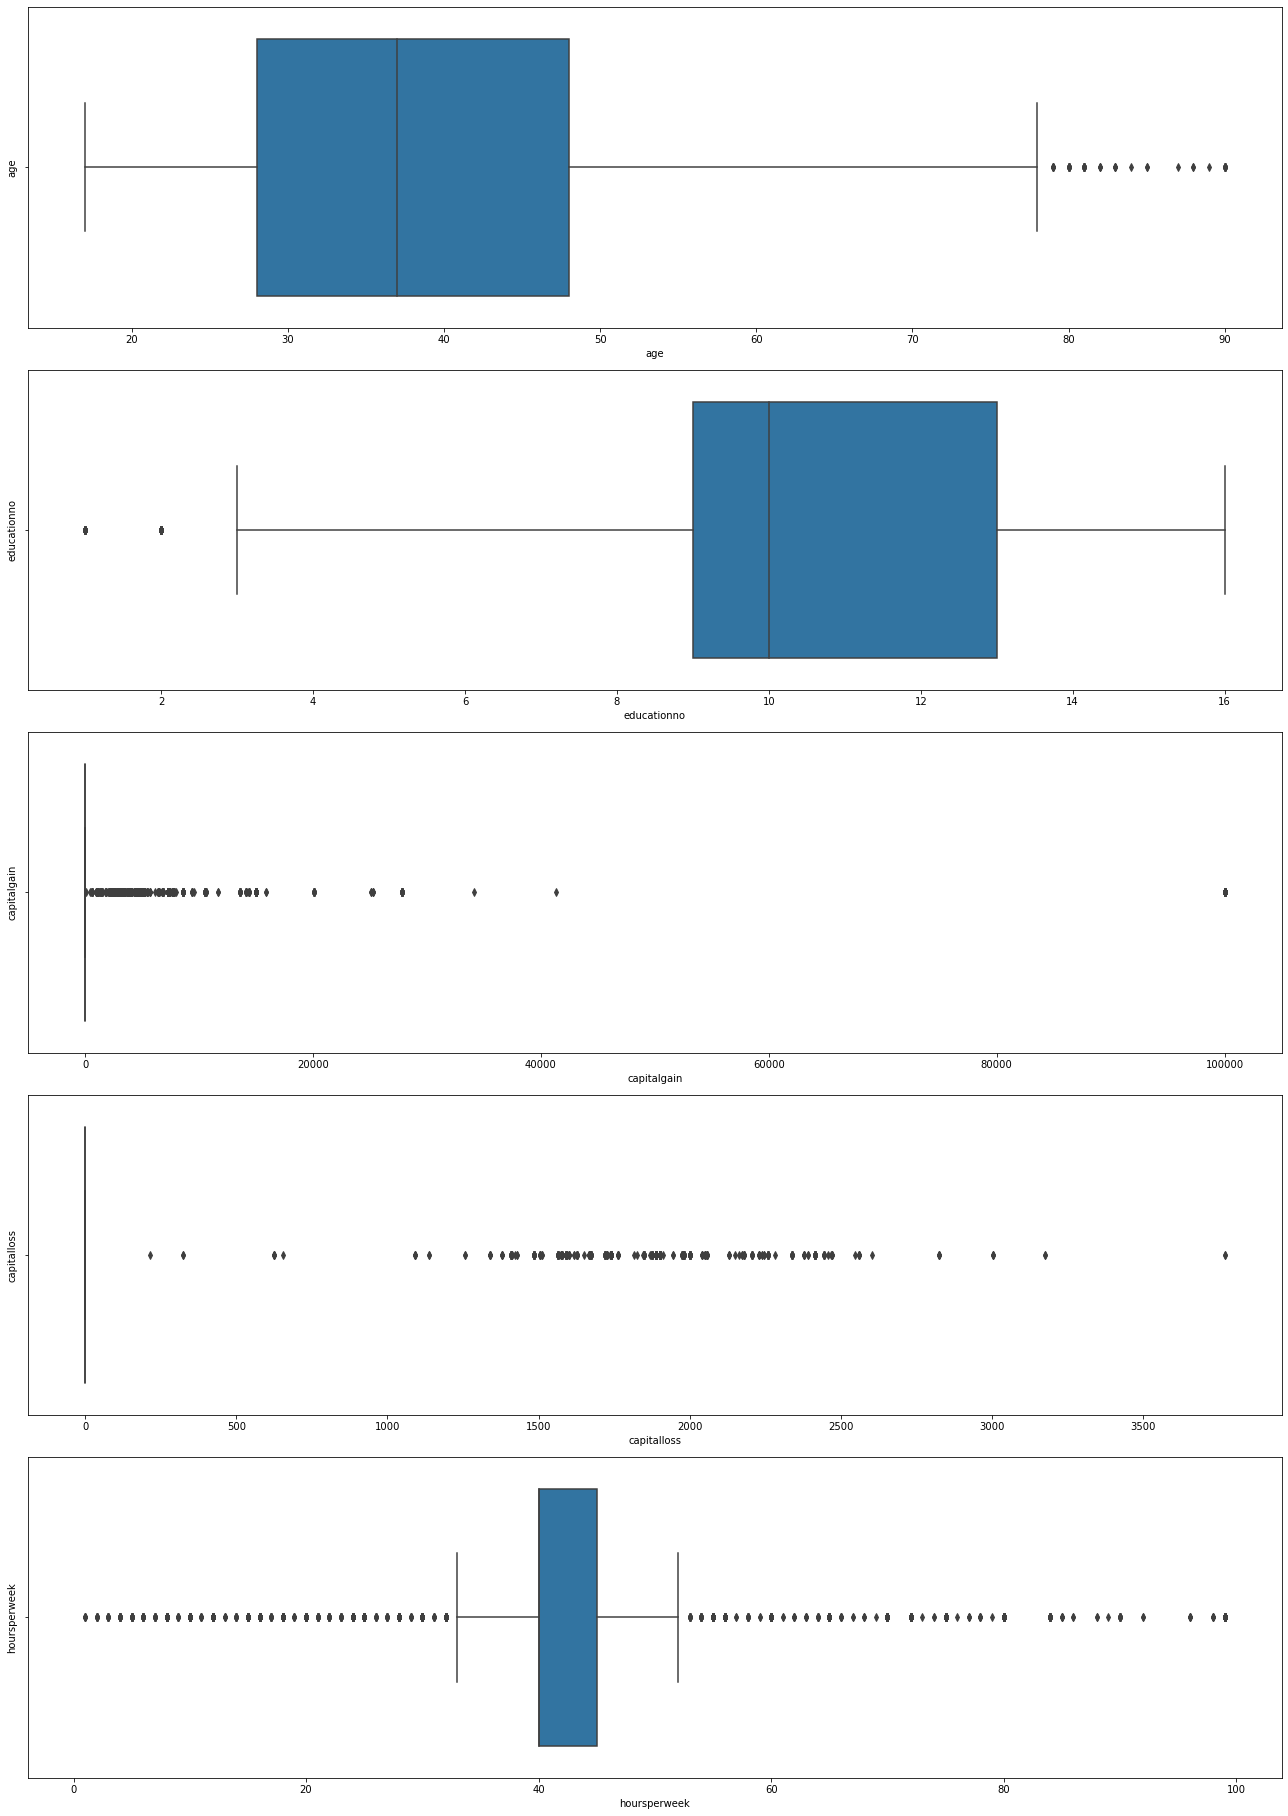

In [106]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,1,i)
    sns.boxplot(df1[col])
    plt.ylabel(col)
plt.tight_layout() 
plt.show()    

In [107]:
pd.DataFrame(data=[num_columns.skew(),num_columns.kurtosis()],index=['skewness','kurtosis'])

,age,educationno,capitalgain,capitalloss,hoursperweek
skewness,0.540470,-0.323417,11.714469,4.480638,0.350586
kurtosis,-0.167675,0.627357,147.608172,18.919706,3.262324


#MODEL BUILDING

In [108]:
col = df1.columns
col

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [109]:
x_train = train[col[0:13]]
y_train = train[col[13]]
x_test = test[col[0:13]]
y_test = test[col[13]]

In [110]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['workclass']=label_encoder.fit_transform(df['workclass'])
df['education']=label_encoder.fit_transform(df['education'])
df['maritalstatus']=label_encoder.fit_transform(df['maritalstatus'])
df['occupation']=label_encoder.fit_transform(df['occupation'])
df['relationship']=label_encoder.fit_transform(df['relationship'])
df['race']=label_encoder.fit_transform(df['race'])
df['sex']=label_encoder.fit_transform(df['sex'])

In [111]:
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174.0,0.0,40.0,23,0.0
1,50,4,9,13,2,3,0,4,1,0.0,0.0,13.0,23,0.0
2,38,2,11,9,0,5,1,4,1,0.0,0.0,40.0,23,0.0
3,53,2,1,7,2,5,0,2,1,0.0,0.0,40.0,23,0.0
4,28,2,9,13,2,9,5,2,0,0.0,0.0,40.0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0.0,0.0,40.0,37,0.0
15056,39,2,9,13,0,9,1,4,0,0.0,0.0,36.0,37,0.0
15057,38,2,9,13,2,9,0,4,1,0.0,0.0,50.0,37,0.0
15058,44,2,9,13,0,0,3,1,1,5455.0,0.0,40.0,37,0.0


In [112]:
df['Salary'] = label_encoder.fit_transform(df['Salary'])
df['native'] = label_encoder.fit_transform(df['native'])

In [113]:
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174.0,0.0,40.0,23,0
1,50,4,9,13,2,3,0,4,1,0.0,0.0,13.0,23,0
2,38,2,11,9,0,5,1,4,1,0.0,0.0,40.0,23,0
3,53,2,1,7,2,5,0,2,1,0.0,0.0,40.0,23,0
4,28,2,9,13,2,9,5,2,0,0.0,0.0,40.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0.0,0.0,40.0,37,0
15056,39,2,9,13,0,9,1,4,0,0.0,0.0,36.0,37,0
15057,38,2,9,13,2,9,0,4,1,0.0,0.0,50.0,37,0
15058,44,2,9,13,0,0,3,1,1,5455.0,0.0,40.0,37,0


In [114]:
# Splitting the data into x and y as input and output

X = df.iloc[:,0:13]
Y = df.iloc[:,13]

In [115]:
X

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174.0,0.0,40.0,23
1,50,4,9,13,2,3,0,4,1,0.0,0.0,13.0,23
2,38,2,11,9,0,5,1,4,1,0.0,0.0,40.0,23
3,53,2,1,7,2,5,0,2,1,0.0,0.0,40.0,23
4,28,2,9,13,2,9,5,2,0,0.0,0.0,40.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0.0,0.0,40.0,37
15056,39,2,9,13,0,9,1,4,0,0.0,0.0,36.0,37
15057,38,2,9,13,2,9,0,4,1,0.0,0.0,50.0,37
15058,44,2,9,13,0,0,3,1,1,5455.0,0.0,40.0,37


In [116]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 15569, dtype: int64